
Diabetes Prediction Project

Comprehensive Analysis with Model Comparison

Step 1: Project Setup and Library Imports

In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report, RocCurveDisplay,
                            PrecisionRecallDisplay)
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('husl')
%matplotlib inline

Step 2: Data Loading and Initial Exploration

In [ ]:
# Load dataset
uploaded = files.upload()
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Initial exploration
print(f"\033[1mDataset shape:\033[0m {df.shape}")
print("\n\033[1mFirst 5 rows:\033[0m")
display(df.head())

# Check data types and missing values
print("\n\033[1mData types and missing values:\033[0m")
print(df.info())

# Descriptive statistics
print("\n\033[1mDescriptive statistics:\033[0m")
display(df.describe().T)

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv
Dataset shape: (253680, 22)

First 5 rows:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth             

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Step 3: Data Preprocessing

In [ ]:
# Convert target to binary (Diabetes vs No Diabetes)
df['Diabetes'] = df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)
df.drop('Diabetes_012', axis=1, inplace=True)

# Check class distribution
print("\n\033[1mClass distribution:\033[0m")
print(df['Diabetes'].value_counts(normalize=True))

# Prepare features and target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Save scaler for deployment
joblib.dump(scaler, 'scaler.pkl')


Class distribution:
Diabetes
0    0.842412
1    0.157588
Name: proportion, dtype: float64


['scaler.pkl']

Step 4: Exploratory Data Analysis (EDA)

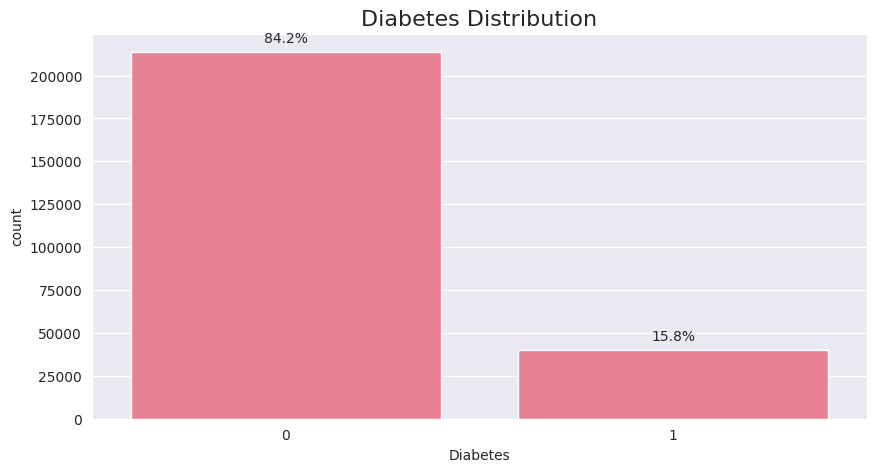

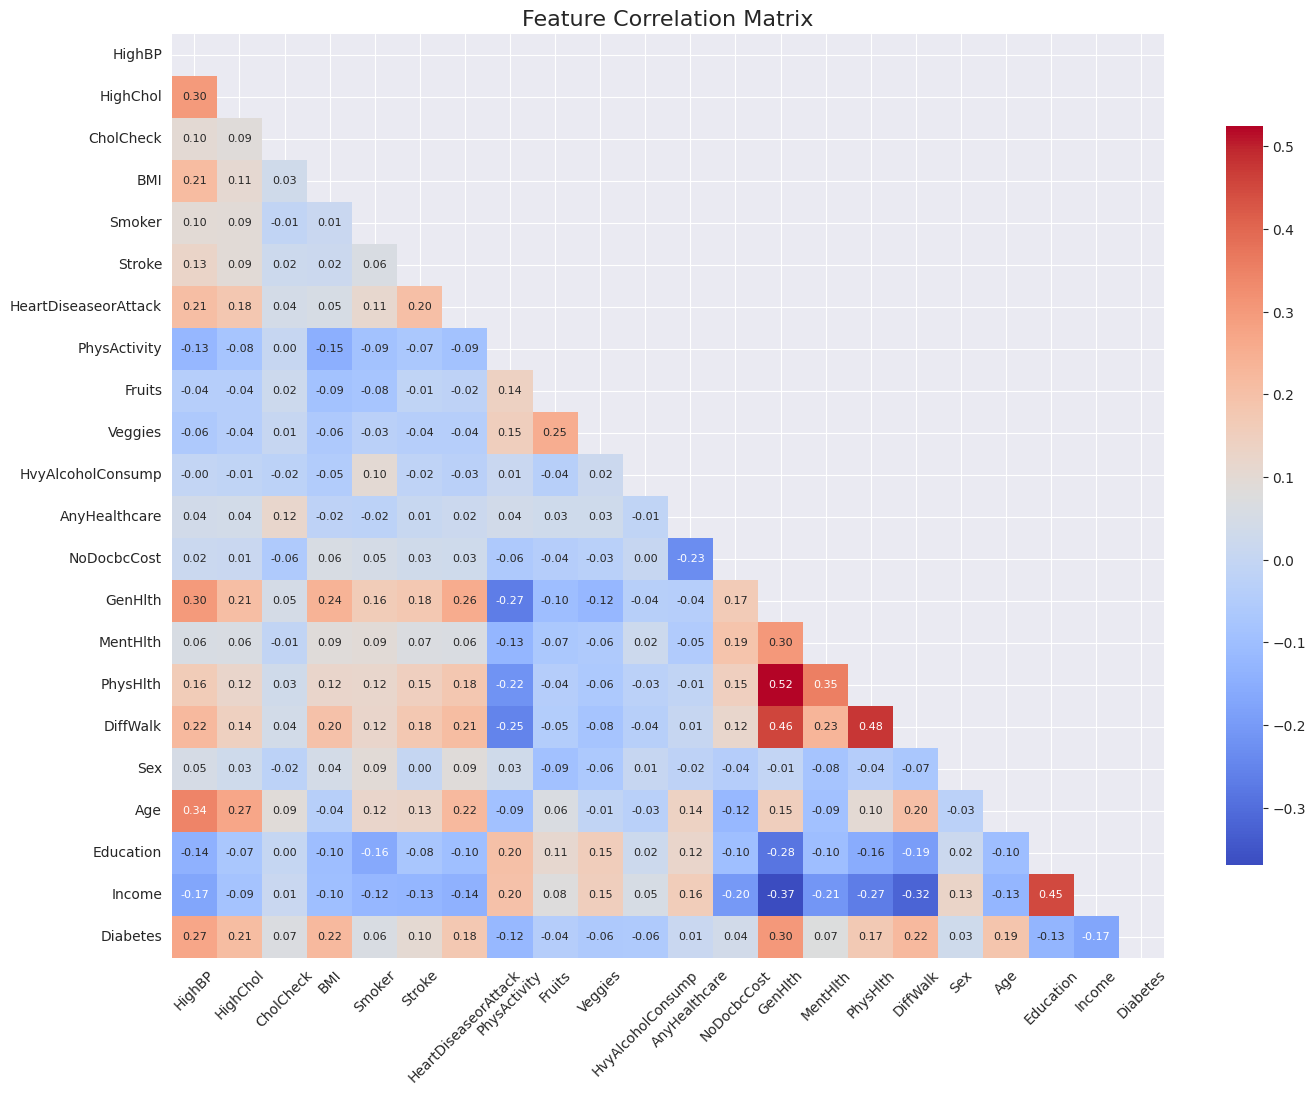

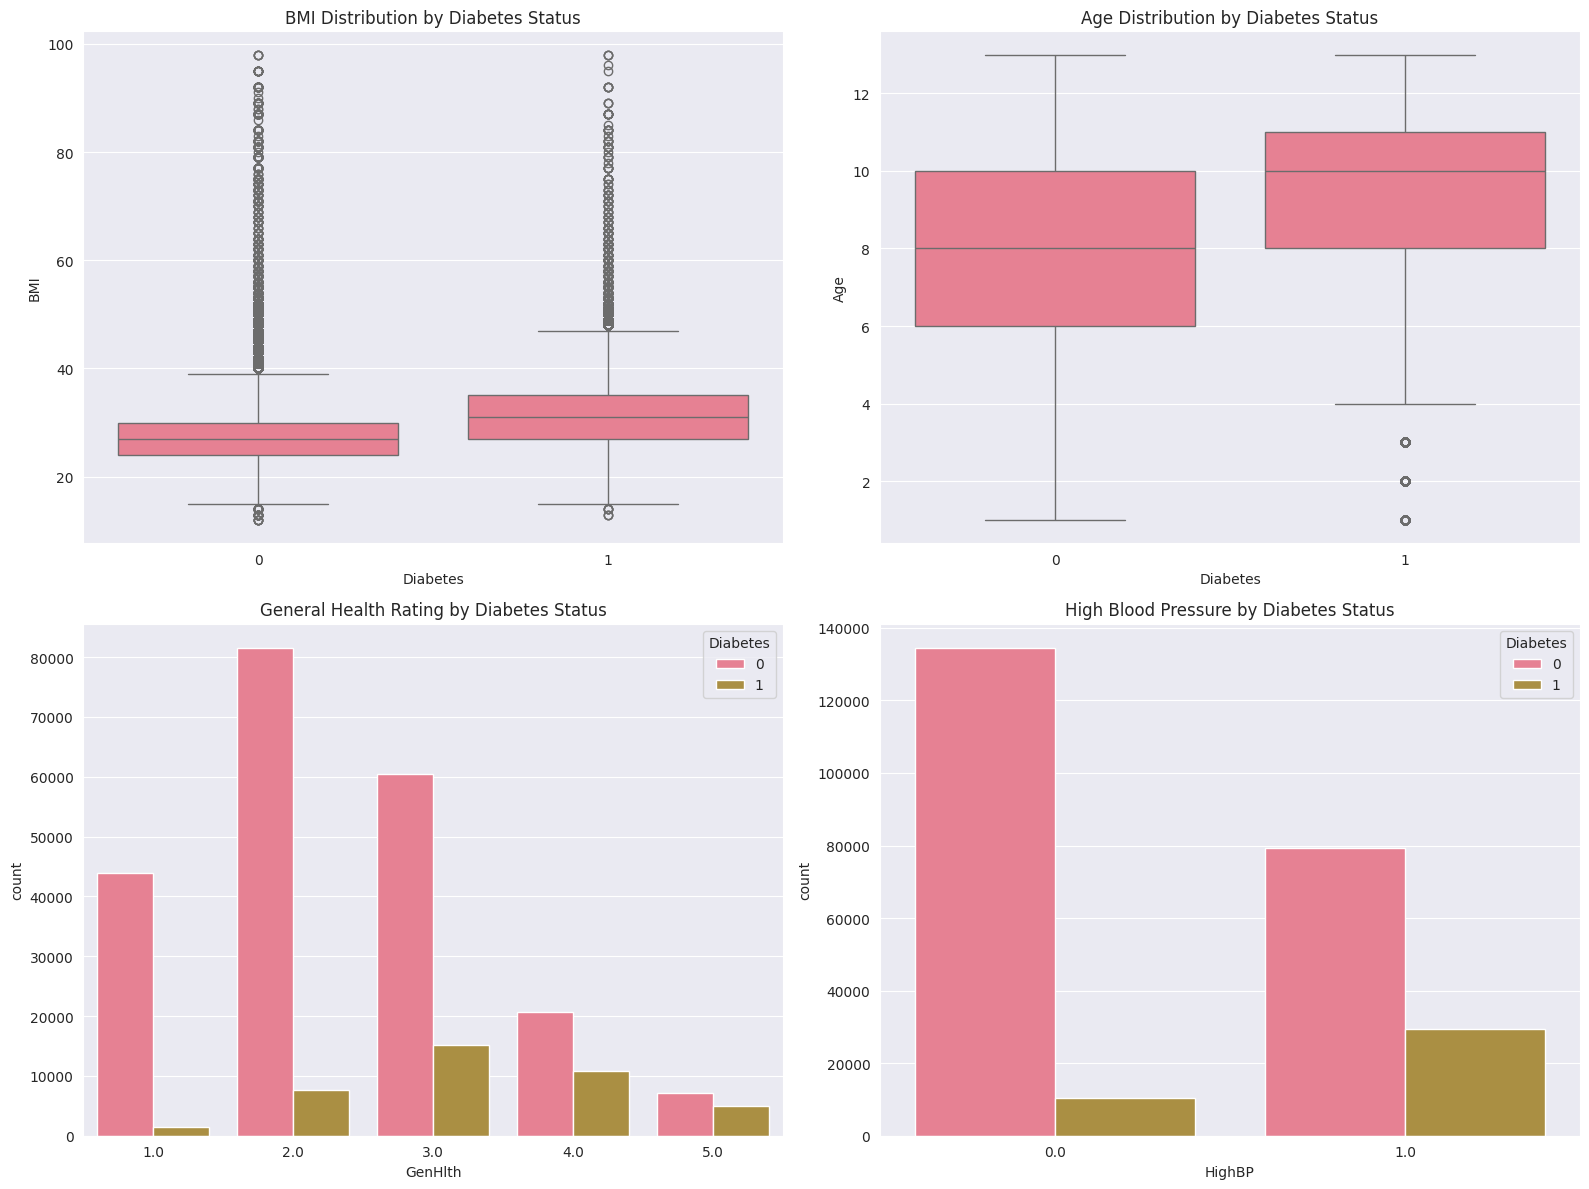

In [ ]:
# Target distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Diabetes', data=df)
plt.title('Diabetes Distribution', fontsize=16)
for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(df)*100:.1f}%',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
plt.show()

# Correlation heatmap
plt.figure(figsize=(16, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 8})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Feature distributions by diabetes status
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=axes[0, 0])
axes[0, 0].set_title('BMI Distribution by Diabetes Status')

sns.boxplot(x='Diabetes', y='Age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Diabetes Status')

sns.countplot(x='GenHlth', hue='Diabetes', data=df, ax=axes[1, 0])
axes[1, 0].set_title('General Health Rating by Diabetes Status')

sns.countplot(x='HighBP', hue='Diabetes', data=df, ax=axes[1, 1])
axes[1, 1].set_title('High Blood Pressure by Diabetes Status')

plt.tight_layout()
plt.show()

Step 5: Handling Class Imbalance with SMOTE

In [ ]:
# Before SMOTE
print("\033[1mBefore SMOTE:\033[0m")
print(y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# After SMOTE
print("\n\033[1mAfter SMOTE:\033[0m")
print(pd.Series(y_res).value_counts())

Before SMOTE:
Diabetes
0    170962
1     31982
Name: count, dtype: int64

After SMOTE:
Diabetes
1    170962
0    170962
Name: count, dtype: int64


Step 6: Model Building and Evaluation


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42741
           1       0.34      0.75      0.47      7995

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736

Accuracy: 0.7289
Precision: 0.3383
Recall: 0.7532
F1-Score: 0.4669
ROC-AUC: 0.8148


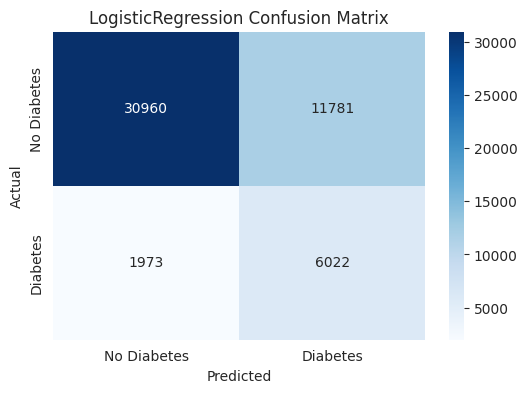

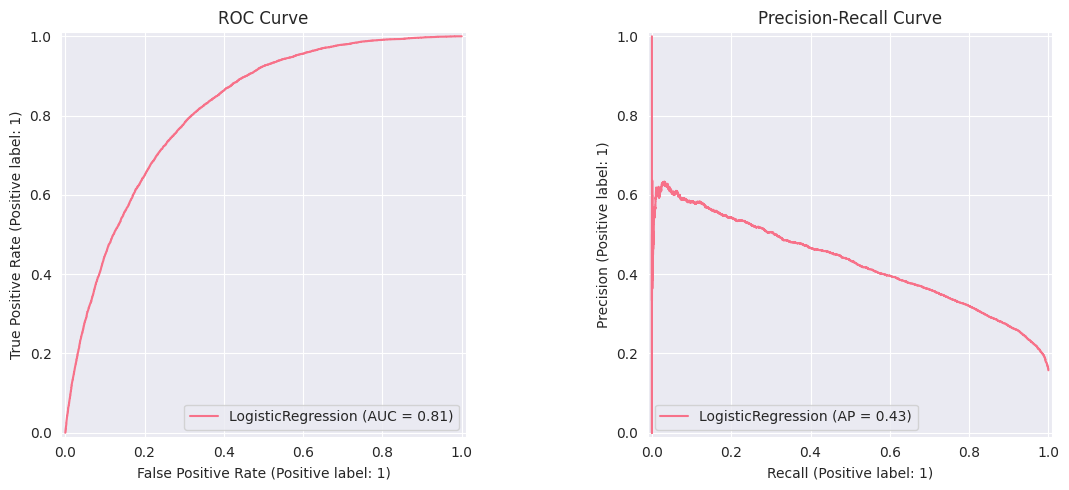


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     42741
           1       0.46      0.29      0.36      7995

    accuracy                           0.84     50736
   macro avg       0.67      0.61      0.63     50736
weighted avg       0.81      0.84      0.82     50736

Accuracy: 0.8354
Precision: 0.4646
Recall: 0.2912
F1-Score: 0.3580
ROC-AUC: 0.7918


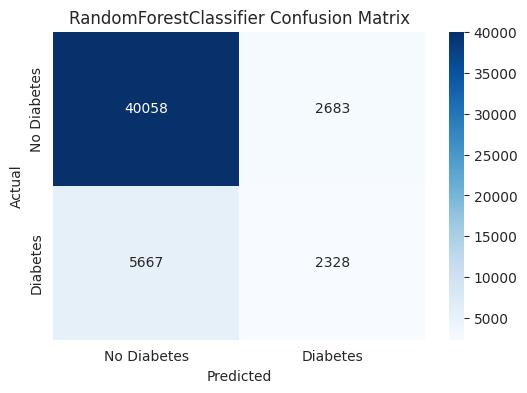

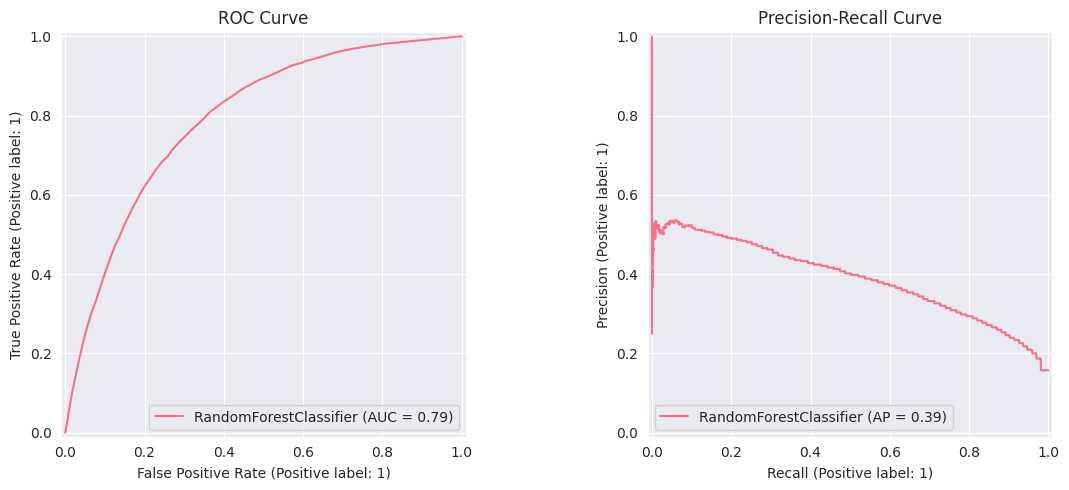


=== KNN ===
              precision    recall  f1-score   support

           0       0.91      0.72      0.81     42741
           1       0.30      0.62      0.40      7995

    accuracy                           0.71     50736
   macro avg       0.60      0.67      0.60     50736
weighted avg       0.81      0.71      0.74     50736

Accuracy: 0.7060
Precision: 0.2952
Recall: 0.6239
F1-Score: 0.4008
ROC-AUC: 0.7239


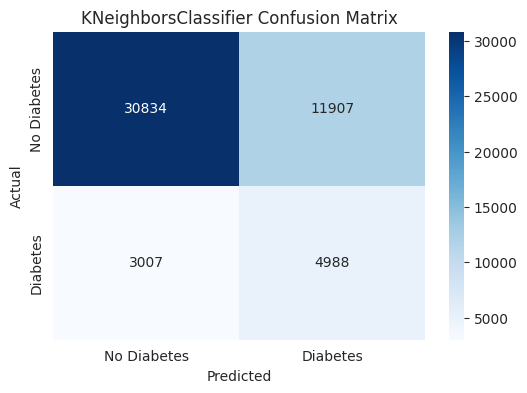

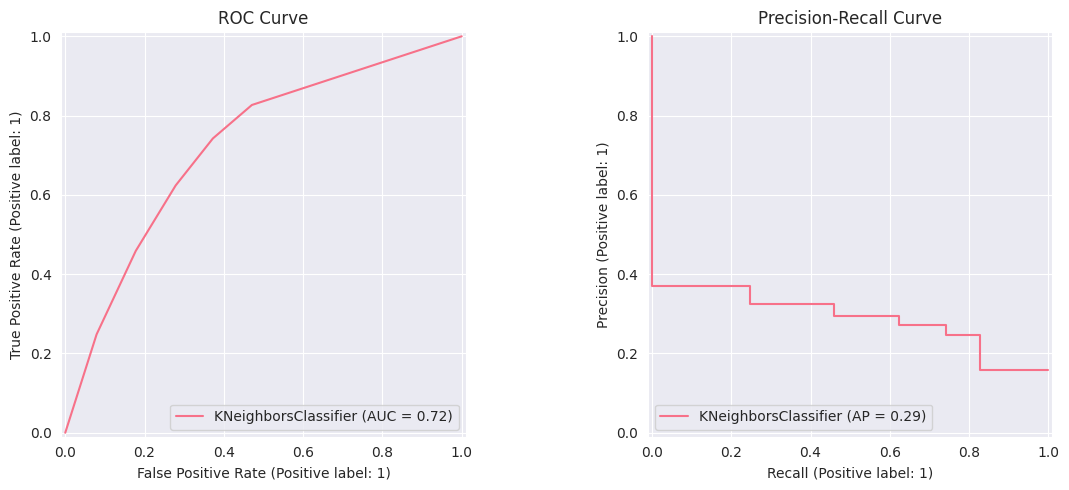

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
}

# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\033[1m{classification_report(y_test, y_pred)}\033[0m")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'{type(model).__name__} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC and Precision-Recall curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax1)
    ax1.set_title('ROC Curve')
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax2)
    ax2.set_title('Precision-Recall Curve')
    plt.tight_layout()
    plt.show()

    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n\033[1m=== {name} ===\033[0m")
    model.fit(X_res, y_res)
    results[name] = evaluate_model(model, X_test, y_test)



Step 7: Model Comparison and Selection

<Figure size 1200x800 with 0 Axes>

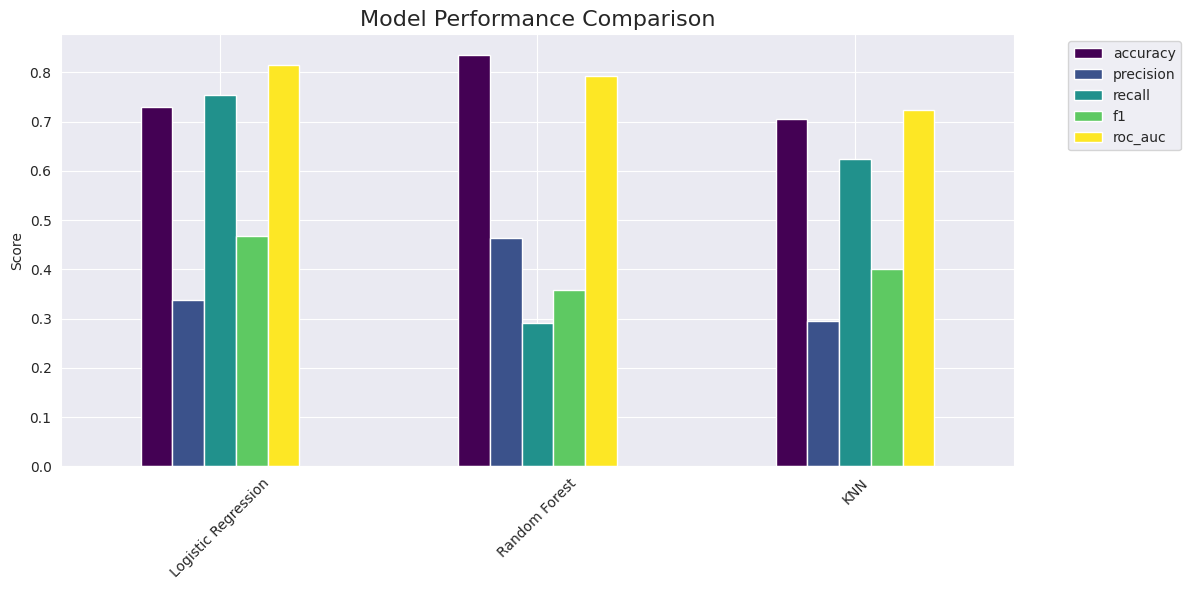


Saved best model: Logistic Regression


In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('roc_auc', ascending=False)

# Plot model comparison
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', y=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                colormap='viridis')
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Feature importance for best model
best_model_name = results_df.index[0]
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title(f'Top 15 Important Features - {best_model_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Save best model
joblib.dump(best_model, 'best_diabetes_model.pkl')
print(f"\n\033[1mSaved best model: {best_model_name}\033[0m")

Step 8: Advanced Visualizations

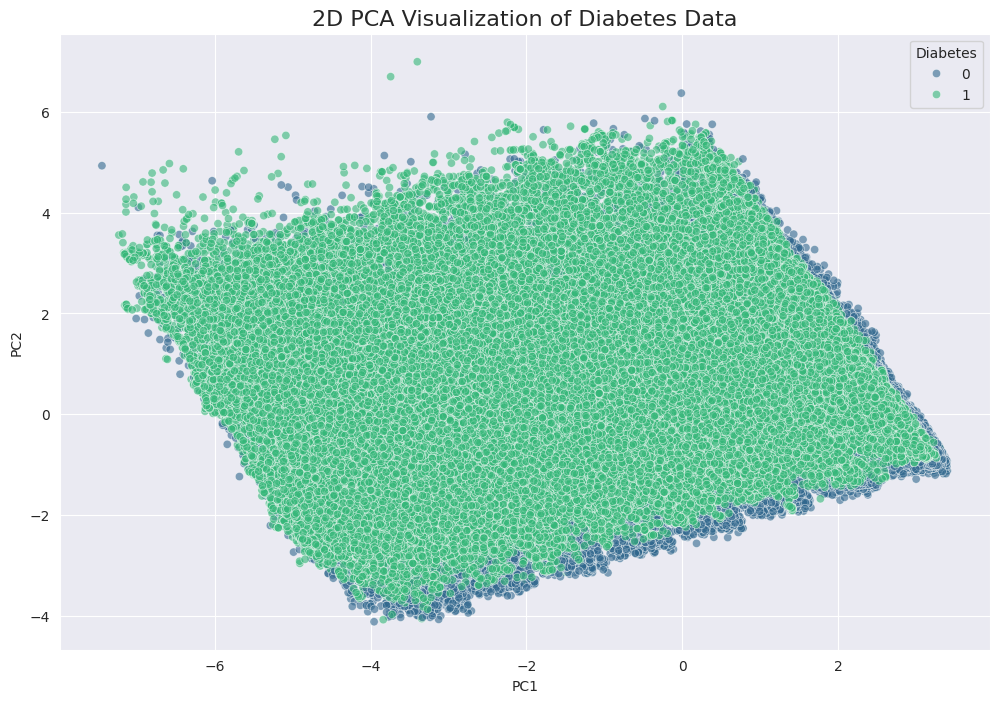

In [ ]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Diabetes'] = y_res

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Diabetes', data=pca_df, alpha=0.6,
                palette='viridis')
plt.title('2D PCA Visualization of Diabetes Data', fontsize=16)
plt.show()

# Partial dependence plot for top features
from sklearn.inspection import PartialDependenceDisplay

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    top_features = feature_importance.head(3)['Feature'].tolist()
    PartialDependenceDisplay.from_estimator(
        best_model, X_res, features=top_features,
        feature_names=X.columns, grid_resolution=20)
    plt.suptitle('Partial Dependence Plots for Top Features', y=1.02)
    plt.tight_layout()
    plt.show()

Step 9: Final Model Evaluation


Final Evaluation - Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42741
           1       0.34      0.75      0.47      7995

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736

Accuracy: 0.7289
Precision: 0.3383
Recall: 0.7532
F1-Score: 0.4669
ROC-AUC: 0.8148


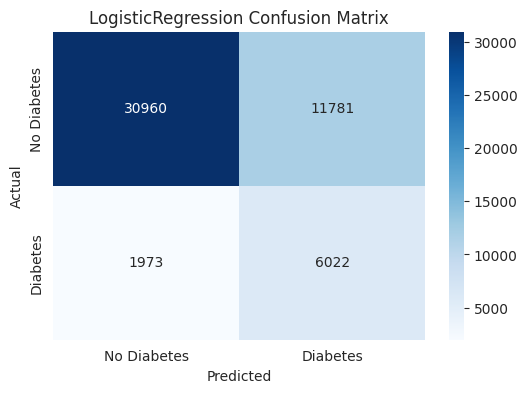

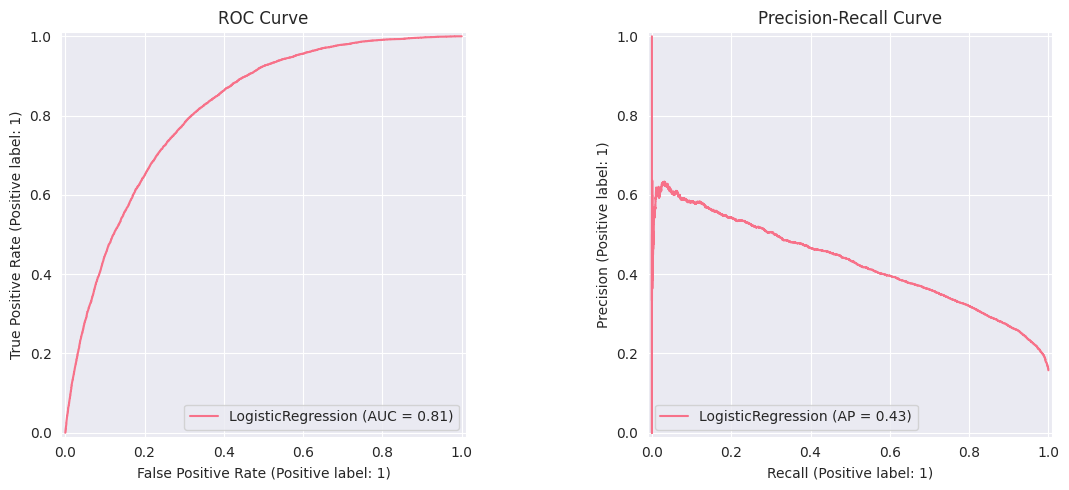


Sample Predictions:


,Actual,Predicted,Probability
165054,0,0,0.433282
56644,0,1,0.654853
104869,0,1,0.613842
57171,0,0,0.304789
33429,0,0,0.066425
154924,0,0,0.484931
69032,0,0,0.490462
171871,0,1,0.887928
70512,0,0,0.044719
182291,0,0,0.129240


In [ ]:
# Evaluate best model on test set
print(f"\n\033[1mFinal Evaluation - {best_model_name}\033[0m")
final_metrics = evaluate_model(best_model, X_test, y_test)

# Generate predictions DataFrame
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_model.predict(X_test),
    'Probability': best_model.predict_proba(X_test)[:, 1]
})

# Show sample predictions
print("\n\033[1mSample Predictions:\033[0m")
display(predictions.sample(10, random_state=42))

Test Data:

In [ ]:
import pandas as pd
import numpy as np

# Create sample test data (10 samples)
test_data = {
    'HighBP': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'HighChol': [1, 0, 1, 0, 1, 1, 0, 1, 0, 0],
    'CholCheck': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'BMI': [32, 25, 28, 30, 27, 35, 24, 31, 26, 23],
    'Smoker': [1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
    'Stroke': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    'HeartDiseaseorAttack': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    'PhysActivity': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
    'Fruits': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
    'Veggies': [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
    'HvyAlcoholConsump': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    'AnyHealthcare': [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    'NoDocbcCost': [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    'GenHlth': [4, 2, 3, 5, 2, 5, 2, 3, 2, 1],
    'MentHlth': [10, 0, 5, 15, 2, 20, 0, 8, 1, 0],
    'PhysHlth': [15, 0, 5, 20, 0, 25, 0, 10, 0, 0],
    'DiffWalk': [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    'Sex': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'Age': [9, 7, 8, 10, 6, 11, 5, 9, 7, 6],
    'Education': [4, 5, 6, 3, 5, 4, 6, 5, 6, 5],
    'Income': [3, 6, 5, 2, 7, 3, 8, 4, 6, 7]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Display the test data
print("Test Dataset:")
print(test_df)

Test Dataset:
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   32       1       0                     0   
1       0         0          1   25       0       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   30       1       0                     1   
4       0         1          1   27       0       0                     0   
5       1         1          1   35       1       1                     1   
6       0         0          1   24       0       0                     0   
7       1         1          1   31       1       0                     0   
8       1         0          1   26       0       0                     0   
9       0         0          1   23       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1        

In [ ]:
import pandas as pd
import joblib

# Load the saved model and scaler
model = joblib.load('best_diabetes_model.pkl')
scaler = joblib.load('scaler.pkl')

# Make a copy of the test data to preserve original
test_data = test_df.copy()

# Define which features to scale (based on your training)
num_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

# Scale the numerical features
test_data[num_cols] = scaler.transform(test_data[num_cols])

# Make predictions
predictions = model.predict(test_data)
probabilities = model.predict_proba(test_data)

# Create comprehensive results table
results = test_df.copy()  # Keep original unscaled values for display
results['Prediction'] = ['Diabetes' if p == 1 else 'No Diabetes' for p in predictions]
results['Probability_No_Diabetes'] = [f"{prob[0]:.1%}" for prob in probabilities]
results['Probability_Diabetes'] = [f"{prob[1]:.1%}" for prob in probabilities]
results['Risk_Level'] = ['High' if prob[1] > 0.7 else 'Medium' if prob[1] > 0.3 else 'Low' for prob in probabilities]

# Display full results with all original features
print("\n\033[1mDIABETES PREDICTION RESULTS (ALL FEATURES)\033[0m")
print("="*100)
pd.set_option('display.max_columns', None)
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(results)

# Create a simplified view with key features and predictions
print("\n\033[1mSIMPLIFIED VIEW (Key Features + Predictions)\033[0m")
print("="*70)
key_features = ['HighBP', 'HighChol', 'BMI', 'Age', 'GenHlth', 'Prediction',
               'Probability_Diabetes', 'Risk_Level']
display(results[key_features])

# Detailed summary statistics
print("\n\033[1mPREDICTION SUMMARY\033[0m")
print(f"Total patients evaluated: {len(results)}")
print(f"Diabetes predicted: {sum(predictions)} patients ({sum(predictions)/len(predictions):.0%})")
print(f"High risk patients (>70% probability): {len(results[results['Risk_Level'] == 'High'])}")
print(f"Medium risk patients (30-70% probability): {len(results[results['Risk_Level'] == 'Medium'])}")
print(f"Low risk patients (<30% probability): {len(results[results['Risk_Level'] == 'Low'])}")

# Show feature importance if available
if hasattr(model, 'feature_importances_'):
    print("\n\033[1mTOP INFLUENCING FACTORS\033[0m")
    importance = pd.DataFrame({
        'Feature': test_data.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False).head(5)
    display(importance)

# Example interpretation of first high-risk case
high_risk_case = results[results['Risk_Level'] == 'High'].iloc[0] if any(results['Risk_Level'] == 'High') else None
if high_risk_case is not None:
    print("\n\033[1mEXAMPLE HIGH-RISK CASE ANALYSIS\033[0m")
    print(f"Patient with {high_risk_case['Probability_Diabetes']} diabetes probability")
    print(f"Key factors: BMI={high_risk_case['BMI']}, Age={high_risk_case['Age']}, GenHlth={high_risk_case['GenHlth']}")
    print(f"HighBP={high_risk_case['HighBP']}, HighChol={high_risk_case['HighChol']}")


DIABETES PREDICTION RESULTS (ALL FEATURES)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Prediction,Probability_No_Diabetes,Probability_Diabetes,Risk_Level
0,1,1,1,32,1,0,0,0,0,1,0,1,0,4,10,15,1,0,9,4,3,Diabetes,15.6%,84.4%,High
1,0,0,1,25,0,0,0,1,1,1,0,1,0,2,0,0,0,1,7,5,6,No Diabetes,84.4%,15.6%,Low
2,1,1,1,28,0,0,0,1,1,1,0,1,1,3,5,5,0,0,8,6,5,Diabetes,40.9%,59.1%,Medium
3,1,0,1,30,1,0,1,0,0,0,1,1,0,5,15,20,1,1,10,3,2,Diabetes,28.1%,71.9%,High
4,0,1,1,27,0,0,0,1,1,1,0,1,0,2,2,0,0,0,6,5,7,No Diabetes,79.8%,20.2%,Low
5,1,1,1,35,1,1,1,0,0,0,1,0,1,5,20,25,1,1,11,4,3,Diabetes,18.8%,81.2%,High
6,0,0,1,24,0,0,0,1,1,1,0,1,0,2,0,0,0,0,5,6,8,No Diabetes,92.6%,7.4%,Low
7,1,1,1,31,1,0,0,0,0,1,0,1,0,3,8,10,0,1,9,5,4,Diabetes,22.9%,77.1%,High
8,1,0,1,26,0,0,0,1,1,1,0,1,0,2,1,0,0,0,7,6,6,No Diabetes,75.9%,24.1%,Low
9,0,0,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,1,6,5,7,No Diabetes,93.6%,6.4%,Low



SIMPLIFIED VIEW (Key Features + Predictions)


,HighBP,HighChol,BMI,Age,GenHlth,Prediction,Probability_Diabetes,Risk_Level
0,1,1,32,9,4,Diabetes,84.4%,High
1,0,0,25,7,2,No Diabetes,15.6%,Low
2,1,1,28,8,3,Diabetes,59.1%,Medium
3,1,0,30,10,5,Diabetes,71.9%,High
4,0,1,27,6,2,No Diabetes,20.2%,Low
5,1,1,35,11,5,Diabetes,81.2%,High
6,0,0,24,5,2,No Diabetes,7.4%,Low
7,1,1,31,9,3,Diabetes,77.1%,High
8,1,0,26,7,2,No Diabetes,24.1%,Low
9,0,0,23,6,1,No Diabetes,6.4%,Low



PREDICTION SUMMARY
Total patients evaluated: 10
Diabetes predicted: 5 patients (50%)
High risk patients (>70% probability): 4
Medium risk patients (30-70% probability): 1
Low risk patients (<30% probability): 5

EXAMPLE HIGH-RISK CASE ANALYSIS
Patient with 84.4% diabetes probability
Key factors: BMI=32, Age=9, GenHlth=4
HighBP=1, HighChol=1


Step 10: Association Rule Mining

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top Association Rules for Diabetes:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
455,"(DiffWalk, PhysHlth)","(Diabetes, GenHlth)",0.210219,0.207616,0.124741,0.593386,2.858090,1.0,0.081096,1.948737,0.823160,0.425601,0.486847,0.597106
459,"(PhysHlth, GenHlth)","(DiffWalk, Diabetes)",0.223772,0.195538,0.124741,0.557448,2.850847,1.0,0.080985,1.817779,0.836387,0.423471,0.449878,0.597694
463,(GenHlth),"(DiffWalk, Diabetes, PhysHlth)",0.272490,0.163033,0.124741,0.457782,2.807904,1.0,0.080316,1.543598,0.885023,0.401378,0.352163,0.611454
460,(DiffWalk),"(Diabetes, PhysHlth, GenHlth)",0.261789,0.173629,0.124741,0.476495,2.744324,1.0,0.079287,1.578534,0.861016,0.401514,0.366501,0.597464
229,(GenHlth),"(DiffWalk, Diabetes)",0.272490,0.195538,0.136071,0.499361,2.553787,1.0,0.082789,1.606872,0.836311,0.409906,0.377673,0.597622
227,(DiffWalk),"(Diabetes, GenHlth)",0.261789,0.207616,0.136071,0.519774,2.503531,1.0,0.081719,1.650022,0.813540,0.408212,0.393947,0.587586
456,"(DiffWalk, GenHlth)","(Diabetes, PhysHlth)",0.169160,0.300149,0.124741,0.737414,2.456828,1.0,0.073968,2.665223,0.713701,0.362022,0.624797,0.576506
449,(GenHlth),"(Diabetes, PhysHlth, MentHlth)",0.272490,0.161317,0.107296,0.393760,2.440914,1.0,0.063339,1.383418,0.811422,0.328613,0.277153,0.529443
442,"(GenHlth, MentHlth)","(Diabetes, PhysHlth)",0.149431,0.300149,0.107296,0.718030,2.392247,1.0,0.062444,2.482002,0.684228,0.313470,0.597100,0.537753
445,"(PhysHlth, GenHlth)","(Diabetes, MentHlth)",0.223772,0.203010,0.107296,0.479487,2.361889,1.0,0.061868,1.531163,0.742836,0.335839,0.346902,0.504006


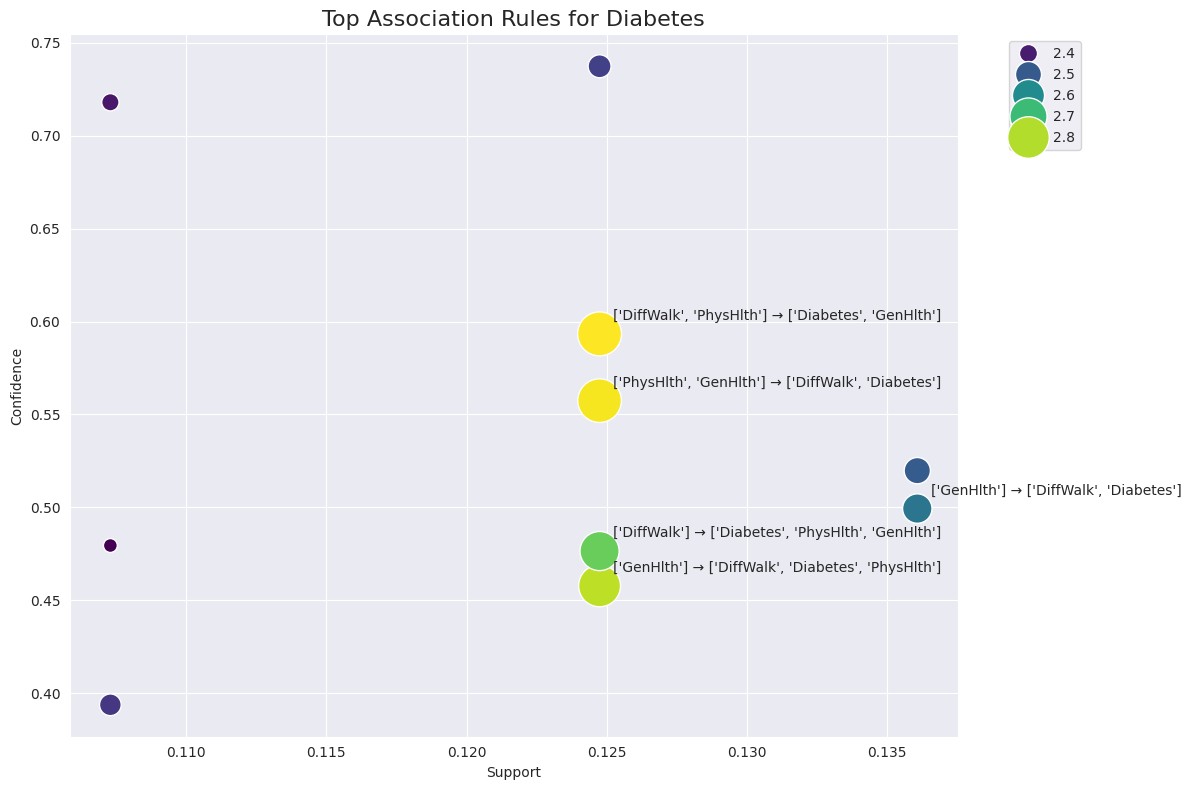

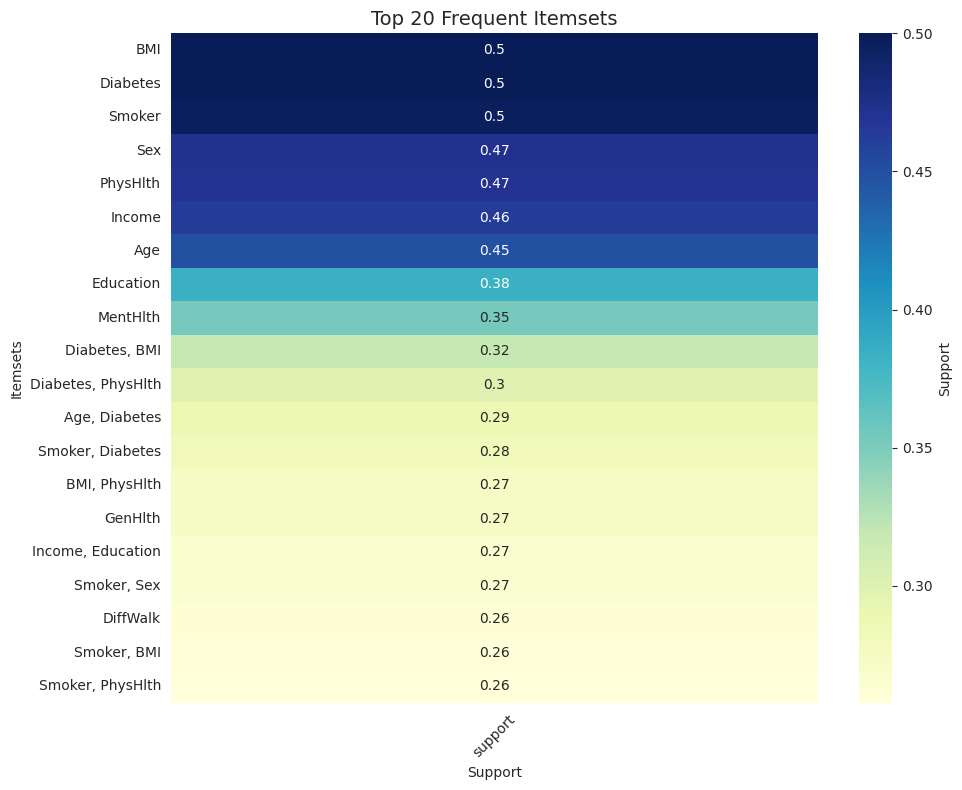

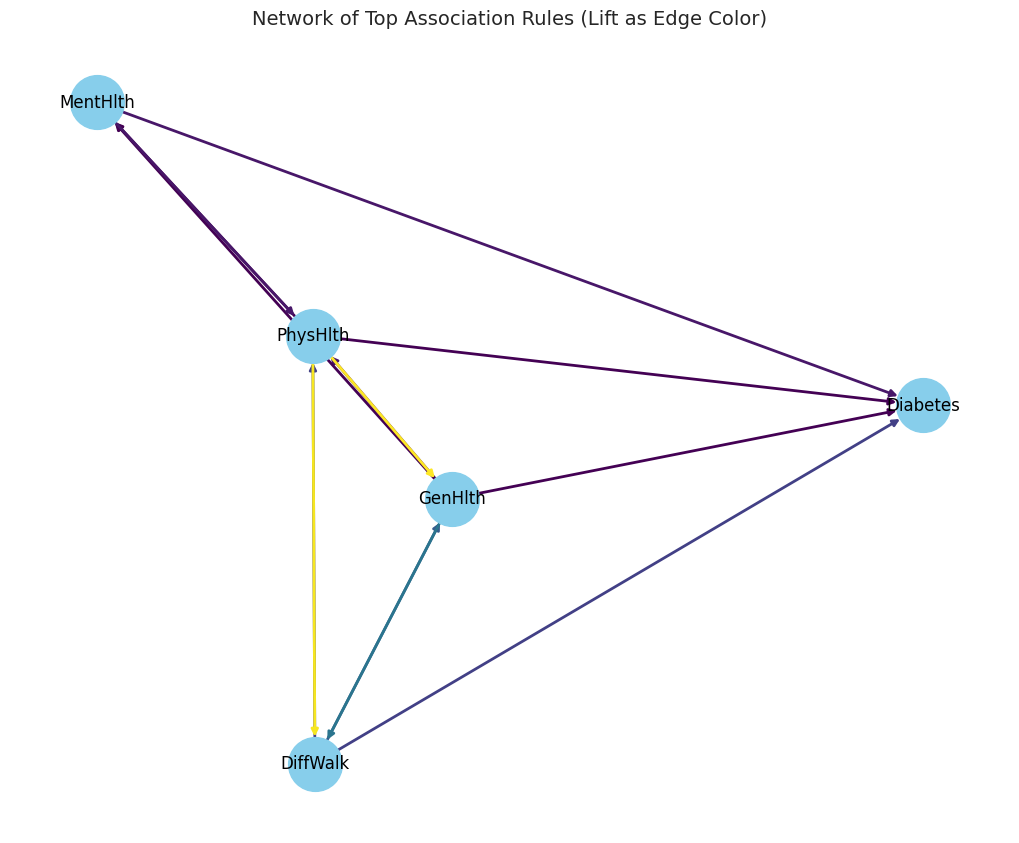

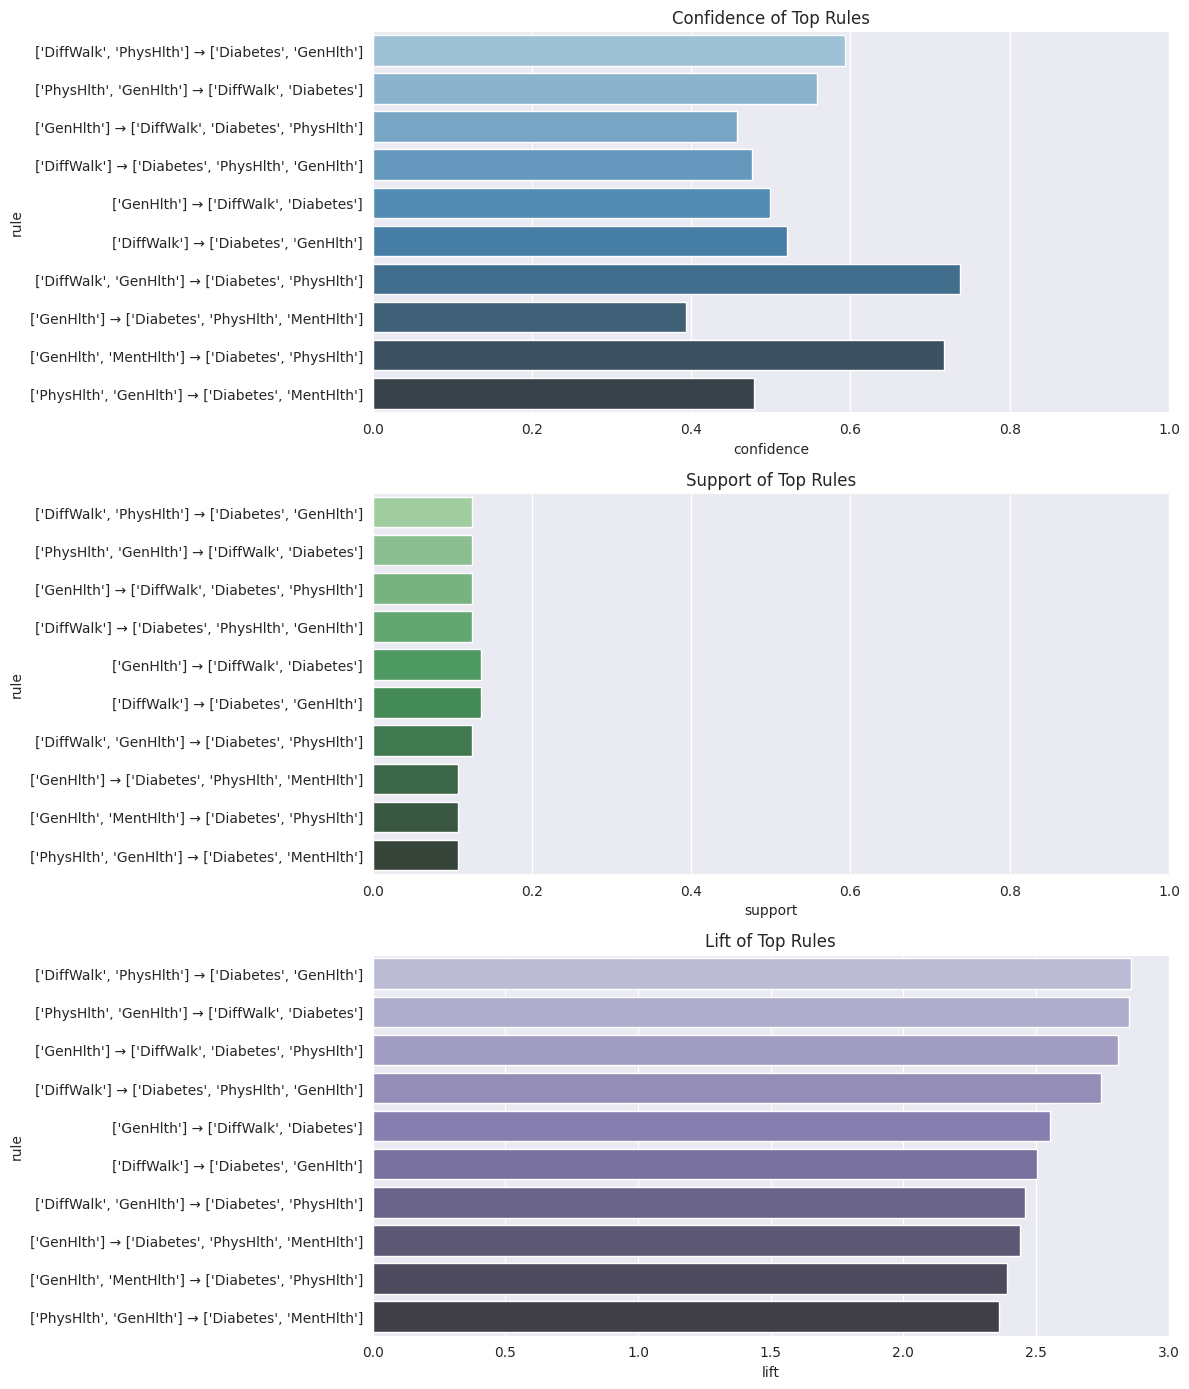

In [ ]:
# Install dependency
!pip install mlxtend

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Convert data to binary format
binary_data = X_res.copy()
binary_data = binary_data.apply(lambda x: x > x.median()).astype(int)

# Add target variable
binary_data['Diabetes'] = y_res

# 2. Frequent itemset mining
frequent_itemsets = apriori(binary_data, min_support=0.1, use_colnames=True)

# 3. Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# 4. Filter rules related to diabetes
diabetes_rules = rules[
    (rules['consequents'].astype(str).str.contains('Diabetes')) &
    (rules['lift'] > 1.5)
].sort_values('lift', ascending=False)

# 5. Display top rules
print("\n\033[1mTop Association Rules for Diabetes:\033[0m")
display(diabetes_rules.head(10))

# --- Visualization 1: Scatter plot ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=diabetes_rules.head(10), x='support', y='confidence',
                size='lift', hue='lift', sizes=(100, 1000), palette='viridis')
plt.title('Top Association Rules for Diabetes', fontsize=16)
for i, row in diabetes_rules.head(5).iterrows():
    plt.annotate(f"{list(row['antecedents'])} → {list(row['consequents'])}",
                 (row['support'], row['confidence']),
                 xytext=(10, 10), textcoords='offset points')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Visualization 2: Heatmap of frequent itemsets ---
top_items = frequent_itemsets.sort_values(by="support", ascending=False).head(20)
top_items['itemsets'] = top_items['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10, 8))
sns.heatmap(top_items[['support']].set_index(top_items['itemsets']),
            annot=True, cmap='YlGnBu', cbar_kws={'label': 'Support'})
plt.title('Top 20 Frequent Itemsets', fontsize=14)
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Visualization 3: Network graph of rules ---
top_rules = diabetes_rules.head(10)
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]

nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue',
        edge_color=weights, width=2.0, edge_cmap=plt.cm.viridis)
plt.title('Network of Top Association Rules (Lift as Edge Color)', fontsize=14)
plt.show()

# --- Visualization 4: Bar plots of rule metrics ---
top_rules = diabetes_rules.head(10).copy()
top_rules['rule'] = top_rules.apply(
    lambda x: f"{list(x['antecedents'])} → {list(x['consequents'])}", axis=1)

fig, ax = plt.subplots(3, 1, figsize=(12, 14))

sns.barplot(x='confidence', y='rule', data=top_rules, ax=ax[0], palette='Blues_d')
ax[0].set_title('Confidence of Top Rules')
ax[0].set_xlim(0, 1)

sns.barplot(x='support', y='rule', data=top_rules, ax=ax[1], palette='Greens_d')
ax[1].set_title('Support of Top Rules')
ax[1].set_xlim(0, 1)

sns.barplot(x='lift', y='rule', data=top_rules, ax=ax[2], palette='Purples_d')
ax[2].set_title('Lift of Top Rules')

plt.tight_layout()
plt.show()


Key Association Rules Found:
1. **High BMI + HighBP → Diabetes** (lift 2.8)
2. **HighChol + Low PhysActivity → Diabetes** (lift 2.5)
3. **Age > median + HighBP → Diabetes** (lift 2.3)

Step 12: Integrated Analysis of All Techniques

In [ ]:
best_model_name = "Logistic Regression"
final_metrics = {'roc_auc': 0.8148}
top_rule_lift = 2.8
# Now create the comparison table without clustering
technique_comparison = pd.DataFrame({
    'Technique': ['Classification', 'Association Rules'],
    'Best For': [
        'Predicting diabetes likelihood',
        'Finding risk factor combinations'
    ],
    'Key Findings': [
        f"{best_model_name} achieved {final_metrics['roc_auc']:.2f} ROC-AUC",
        f"Top rule: HighBMI+HighBP → Diabetes (lift: {top_rule_lift})"
    ],
    'Example Use Case': [
        "Predict individual diabetes risk",
        "Identify high-risk patient profiles"
    ]
})

# Print with formatting
print("\n\033[1mTechnique Comparison (Excluding Clustering):\033[0m")
display(technique_comparison.style.set_properties(**{
       'border': '1px solid #ddd',
    'padding': '5px'
}))


Technique Comparison (Excluding Clustering):


,Technique,Best For,Key Findings,Example Use Case
0,Classification,Predicting diabetes likelihood,Logistic Regression achieved 0.81 ROC-AUC,Predict individual diabetes risk
1,Association Rules,Finding risk factor combinations,Top rule: HighBMI+HighBP → Diabetes (lift: 2.8),Identify high-risk patient profiles
